<a href="https://colab.research.google.com/github/Dltmd202/StockAnalytics/blob/main/StockAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing

In [4]:
!pip install yfinance
!pip install pandas-datareader

# 삼성전자와 마이크로소프트

* 삼성전자와 마이크로소프트 주가 비교

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


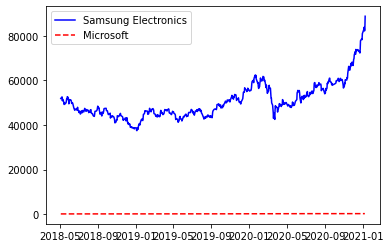

In [12]:
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

sec = pdr.get_data_yahoo('005930.KS',start='2018-05-04')
msft =pdr.get_data_yahoo('MSFT',start='2018-05-04')

plt.plot(sec.index,sec.Close,'b',label='Samsung Electronics')
plt.plot(msft.index,msft.Close,'r--',label='Microsoft')
plt.legend(loc='best')
plt.show()







* 삼성전자 종가

In [15]:
sec['Close']

Date
2018-05-04    51900.0
2018-05-08    52600.0
2018-05-09    50900.0
2018-05-10    51600.0
2018-05-11    51300.0
               ...   
2021-01-04    83000.0
2021-01-05    83900.0
2021-01-06    82200.0
2021-01-07    82900.0
2021-01-08    88800.0
Name: Close, Length: 657, dtype: float64

* 삼성전자 일간 변동률

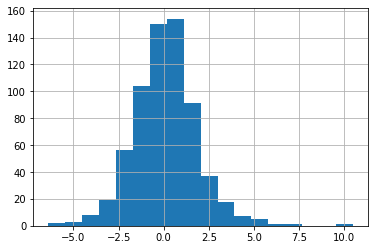

count    657.000000
mean       0.097480
std        1.777825
min       -6.387665
25%       -0.992063
50%        0.107181
75%        1.063830
max       10.470588
Name: Close, dtype: float64

In [24]:
sec_daily_percent_change = (sec['Close']/sec['Close'].shift(1)-1) * 100
sec_daily_percent_change.iloc[0] = 0
plt.hist(sec_daily_percent_change,bins=18)
plt.grid(True)
plt.show()
sec_daily_percent_change.describe()

* 삼성전자 일간 변동률 누적합

In [22]:
sec_daily_percent_changeSum = sec_daily_percent_change.cumsum()
sec_daily_percent_changeSum

Date
2018-05-04     0.000000
2018-05-08     1.348748
2018-05-09    -1.883192
2018-05-10    -0.507946
2018-05-11    -1.089341
                ...    
2021-01-04    57.017436
2021-01-05    58.101773
2021-01-06    56.075552
2021-01-07    56.927133
2021-01-08    64.044142
Name: Close, Length: 657, dtype: float64

* 마이크로소프트 종가

In [23]:
msft['Close']

Date
2018-05-04     95.160004
2018-05-07     96.220001
2018-05-08     95.809998
2018-05-09     96.940002
2018-05-10     97.910004
                 ...    
2020-12-31    222.419998
2021-01-04    217.690002
2021-01-05    217.899994
2021-01-06    212.250000
2021-01-07    218.289993
Name: Close, Length: 675, dtype: float64

* 마이크로소프트 일간 변동률

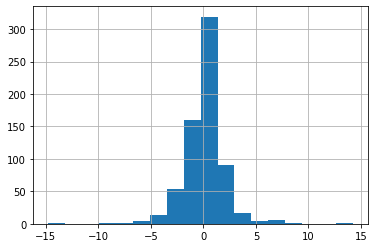

count    675.000000
mean       0.144021
std        2.046149
min      -14.739031
25%       -0.724519
50%        0.164399
75%        1.060254
max       14.216888
Name: Close, dtype: float64

In [26]:
msft_daily_percent_change = (msft['Close']/msft['Close'].shift(1)-1) * 100
msft_daily_percent_change.iloc[0] = 0
plt.hist(msft_daily_percent_change,bins=18)
plt.grid(True)
plt.show()
msft_daily_percent_change.describe()

* 마이크로소프트 일간 변동률 누적합

In [27]:
msft_daily_percent_changeSum = msft_daily_percent_change.cumsum()
msft_daily_percent_changeSum

Date
2018-05-04     0.000000
2018-05-07     1.113911
2018-05-08     0.687800
2018-05-09     1.867223
2018-05-10     2.867843
                ...    
2020-12-31    98.991635
2021-01-04    96.865029
2021-01-05    96.961493
2021-01-06    94.368563
2021-01-07    97.214261
Name: Close, Length: 675, dtype: float64

* 삼성전자 마이크로소프트 주식수익률 비교

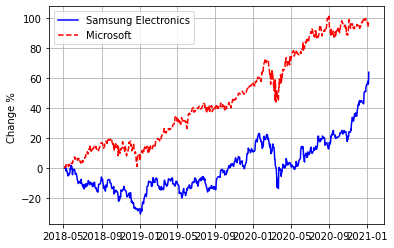

In [29]:
plt.plot(sec.index , sec_daily_percent_changeSum,'b',label='Samsung Electronics')
plt.plot(msft.index,msft_daily_percent_changeSum,'r--',label='Microsoft')
plt.grid(True)
plt.ylabel('Change % ')
plt.legend(loc='best')
plt.show()

# KOSPI 와 Dow Jones

* KOSPI MDD

[*********************100%***********************]  1 of 1 completed


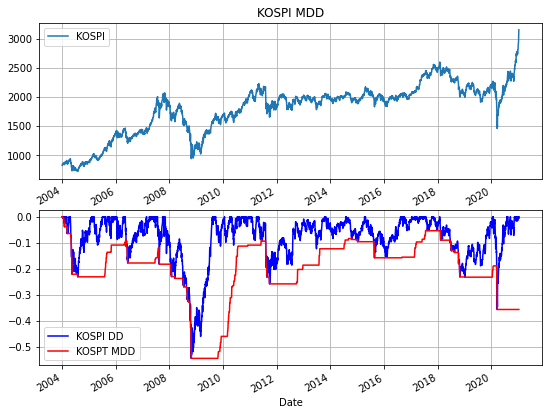

In [33]:
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt

yf.pdr_override()

kospi = pdr.get_data_yahoo('^KS11','2004-01-04')

window = 252
peak = kospi['Adj Close'].rolling(window,min_periods=1).max()
drawdown = kospi['Adj Close']/peak - 1.0 
max_dd = drawdown.rolling(window , min_periods=1).min()

plt.figure(figsize=(9,7))
plt.subplot(211)
kospi['Close'].plot(label='KOSPI',title='KOSPI MDD',grid = True, legend=True)
plt.subplot(212)
drawdown.plot(c='blue',label='KOSPI DD',grid=True,legend=True)
max_dd.plot(c='red' , label='KOSPT MDD' , grid =True , legend = True)
plt.show()